In [26]:
from pydantic import BaseModel
import pandas as pd 
import os
from dotenv import load_dotenv
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
load_dotenv()
import os 
from langchain_core.messages import HumanMessage, SystemMessage
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GOOGLE_SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")
from typing import Annotated, Literal, TypedDict

import bs4

from langchain import hub
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough,RunnableLambda
from langchain_google_genai import ChatGoogleGenerativeAI,GoogleGenerativeAIEmbeddings
from langchain_groq import ChatGroq
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import FlashrankRerank
from langchain.utilities import GoogleSerperAPIWrapper
from langchain.load import dumps, loads
from langchain.prompts import PromptTemplate,ChatPromptTemplate
from langchain_google_genai import GoogleGenerativeAIEmbeddings,ChatGoogleGenerativeAI
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)
# llm = ChatGroq(temperature=0, model_name="Gemma2-9b-It")
from langgraph.graph.message import add_messages
from pydantic import BaseModel,Field
from langchain_core.tools import tool
from langgraph.graph import StateGraph,MessagesState,END
from langgraph.prebuilt import ToolNode
from langchain_core.messages import HumanMessage
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.graph import START,END

import random
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage,HumanMessage

In [27]:
#implement breakpoints for tool nodes

In [28]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

tools = [add, multiply, divide]
llm_with_tools = llm.bind_tools(tools)

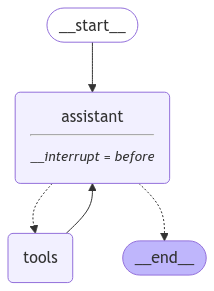

In [29]:
from IPython.display import Image, display

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine the control flow
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")

memory = MemorySaver()
graph = builder.compile(interrupt_before=["assistant"], checkpointer=memory)

# Show
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [30]:
# Input
initial_input = {"messages": HumanMessage(content="Multiply 2 and 3")}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 2 and 3


In [31]:

state = graph.get_state(thread)
state.next

('assistant',)

In [32]:
for event in graph.stream(None, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (76b5f647-1094-4816-ba1e-d120a9e36067)
 Call ID: 76b5f647-1094-4816-ba1e-d120a9e36067
  Args:
    a: 2.0
    b: 3.0
================================= Tool Message =================================
Name: multiply

6


In [33]:
num_chars = 0
prev_char_space = False

# Iterate through the text
for char in text:
    if char != " ":
        num_chars += 1
        prev_char_space = False
    elif not prev_char_space:  # Count one space, ignore consecutive spaces
        num_chars += 1
        prev_char_space = True

print(f"Number of Characters: {num_chars}")

NameError: name 'text' is not defined

In [ ]:
response = {
    "key1": "Hello, world!",
    "key2": "Python is great.",
    "key3": "Let's count tokens."
}
print(" ".join([response[x] for x in response]))

Hello, world! Python is great. Let's count tokens.


In [34]:
def multiply(a:int, b:int):
    "Mul"
    return a*b


def add(a:int, b:int):
    "Mul"
    return a+b

def div(a:int, b:int):
    "Mul"
    return a/b

In [35]:
tools=[multiply,add,div]

llm_with_tools=llm.bind_tools(tools)

In [ ]:
## aaba hamle system message garney statemessage ni garney

In [36]:
sys_message=SystemMessage("You are a helpful assistant to use a different tools for performing ")


In [37]:
def assitant(state:MessagesState):
    return {"messages": [llm_with_tools.invoke([sys_message]+state["messages"])]}

In [ ]:
#graph 

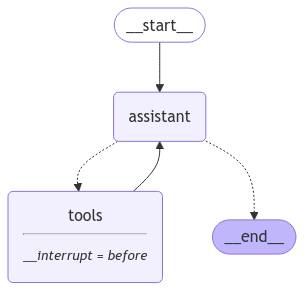

In [46]:
builder =StateGraph(MessagesState)

builder.add_node("assistant",assistant)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START,"assistant")
builder.add_conditional_edges("assistant",tools_condition)
builder.add_edge("tools","assistant")
memory=MemorySaver()
graph=builder.compile(interrupt_before=["tools"], checkpointer=memory)
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [47]:
initial_inputs={"messages":"Multiply 2 and 3"}
thread={"configurable":{"thread_id":"2"}}
for event in graph.stream(initial_inputs,thread,stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (d5e06a9f-463a-41c1-83e2-a4fb27adf71e)
 Call ID: d5e06a9f-463a-41c1-83e2-a4fb27adf71e
  Args:
    a: 2.0
    b: 3.0


In [44]:
state=graph.get_state(thread)
state.next

('assistant',)

In [49]:
initial_input={"messages":"Multipyly 2 and 2"}
thread={"configurable":{"thread_id":"2"}}

for event in graph.stream(initial_inputs,thread,stream_mode="values"):
    event['messages'][-1].pretty_print()

user_approval=input("DO you want to approve")
if user_approval.lower()=="yes":
    for event in graph.stream(None,thread,stream_mode="values"):
        event['messages'][-1].pretty_print()
else:
    print("operation cancelled by user")


================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (1961dc1a-6fbf-412a-a1c5-799f37f6e417)
 Call ID: 1961dc1a-6fbf-412a-a1c5-799f37f6e417
  Args:
    a: 2.0
    b: 3.0
================================== Ai Message ==================================
Tool Calls:
  multiply (1961dc1a-6fbf-412a-a1c5-799f37f6e417)
 Call ID: 1961dc1a-6fbf-412a-a1c5-799f37f6e417
  Args:
    a: 2.0
    b: 3.0
================================= Tool Message =================================
Name: multiply

6
================================== Ai Message ==================================

6
